In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv(".\\SeoulBikeData_utf8.csv")
df


,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


Acondicionando datos cualitativos

In [13]:
df["Winter"]=0
df["Summer"]=0
df["Spring"]=0
df["Autumn"]=0

for i in range(df.shape[0]):
    if df.at[i,"Seasons"]=="Winter":
        df.at[i,"Winter"] = 1
    
    elif df.at[i,"Seasons"] == "Summer":
        df.at[i,"Summer"]=1
    elif df.at[i,"Seasons"] == "Spring":
        df.at[i,"Spring"]=1
    elif df.at[i,"Seasons"] == "Autumn":
        df.at[i,"Autumn"]=1

df["Holiday"]=df["Holiday"].map({'No Holiday': 0, 'Holiday': 1})
df["Functioning Day"]=df["Functioning Day"].map({'Yes': 1, 'No': 0})

df

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Winter,Summer,Spring,Autumn
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,1,0,0,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,1,0,0,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,1,0,0,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,1,0,0,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,0,1,0,0,0,1
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,0,1,0,0,0,1
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,0,1,0,0,0,1
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,0,1,0,0,0,1


Quitar Date porque no es un dato --
Quitar Seasons porque se incluyeron dummies --
Quitar Autumn porque es una de las dummies (evitar multicolinealidad)

In [14]:
X=df.drop(["Date", "Seasons" , "Autumn"], axis=1)

marco=['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Winter', 'Summer', 'Spring', 'Autumn']

df_marco=df[marco]



Visualizar y Calcular Outliers para eliminar datos atipicos

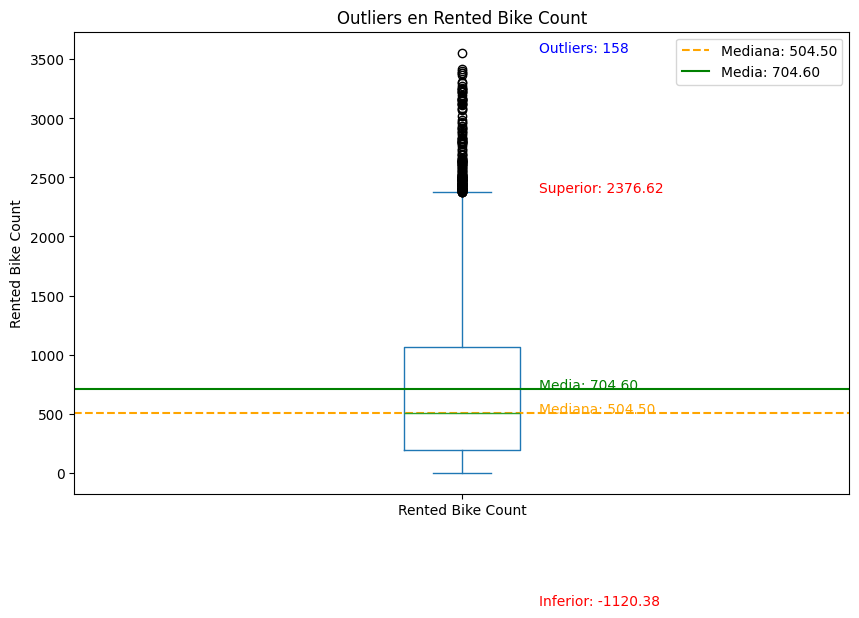

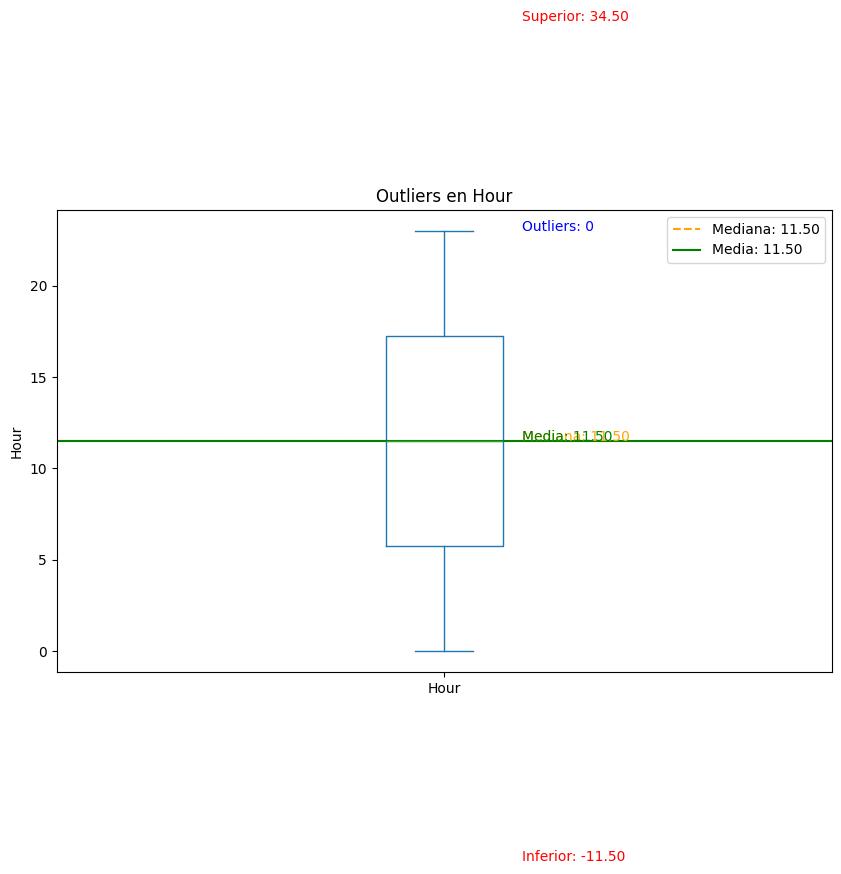

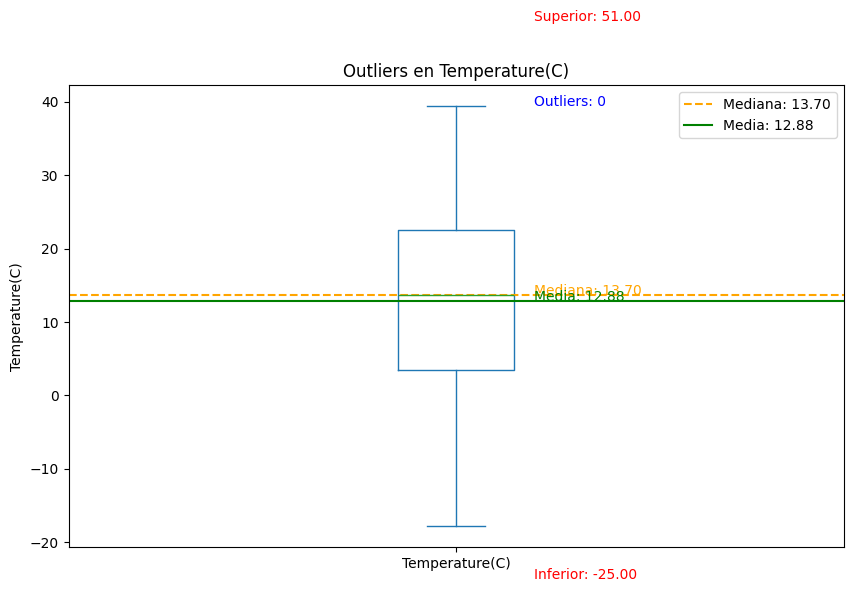

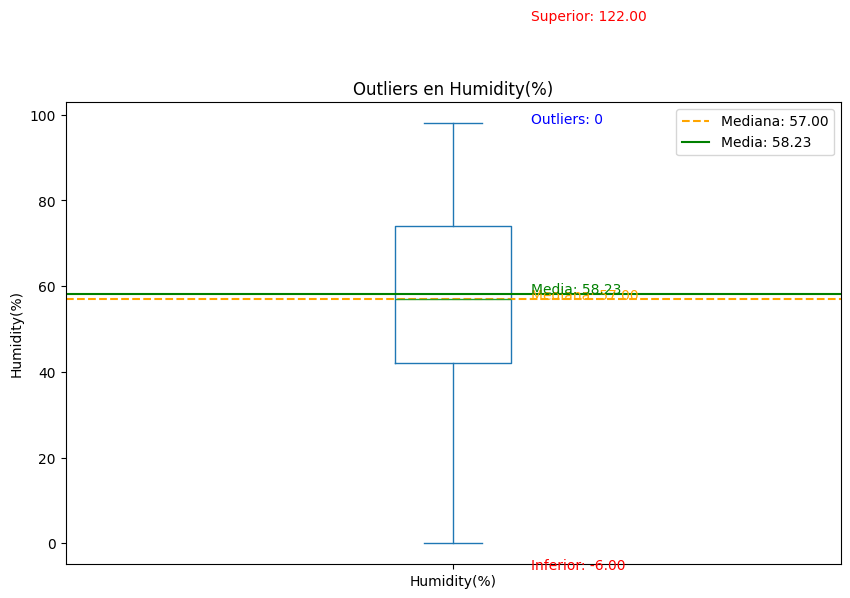

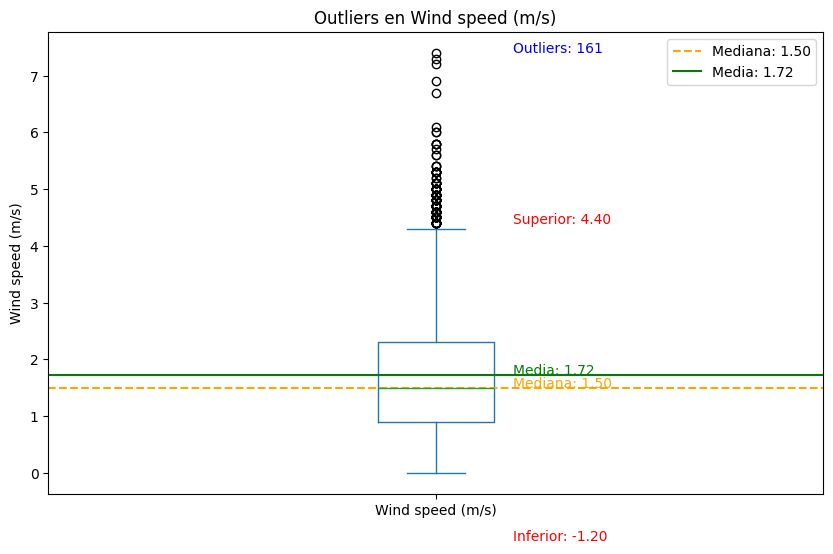

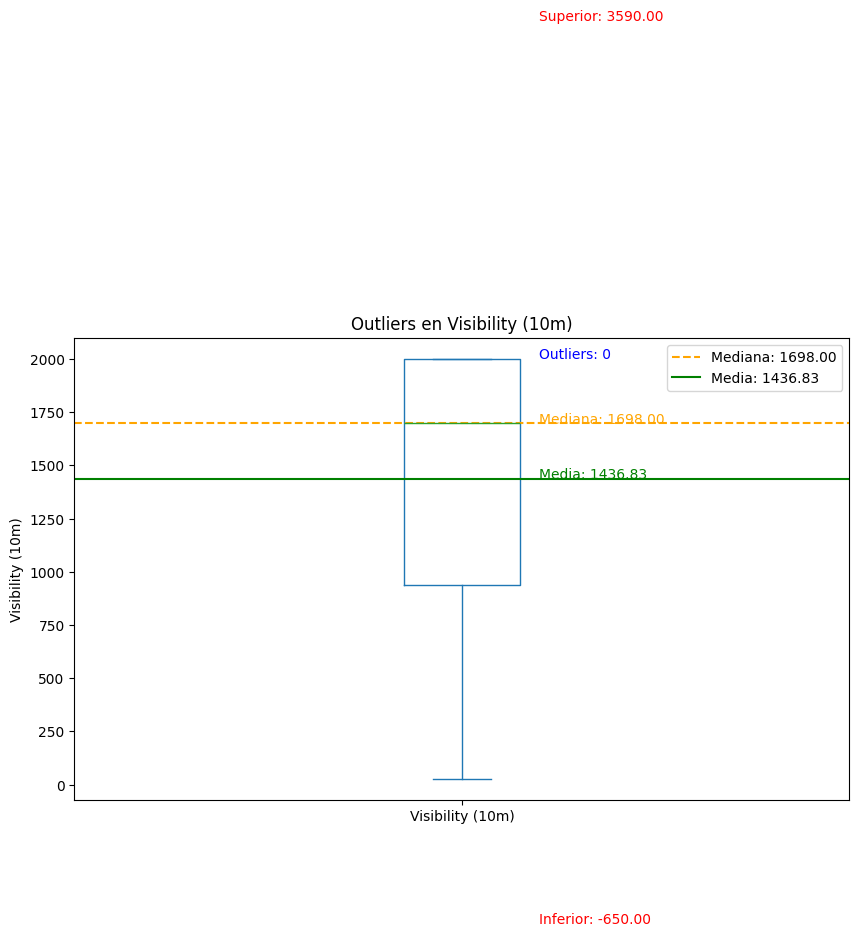

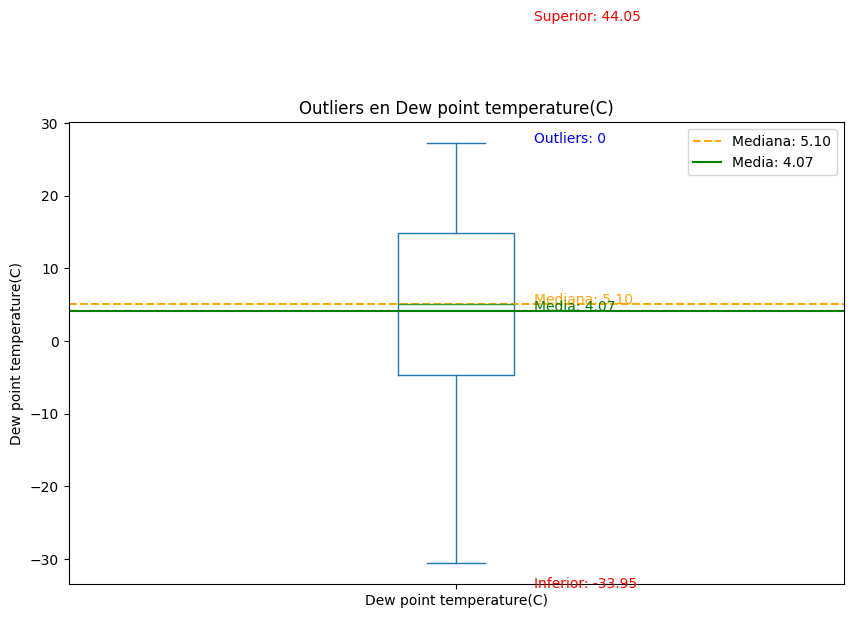

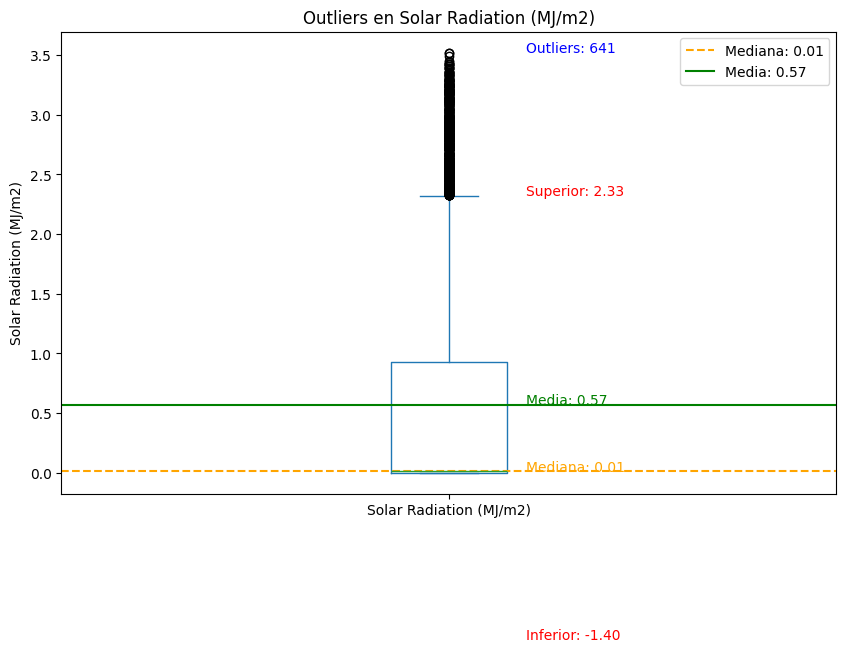

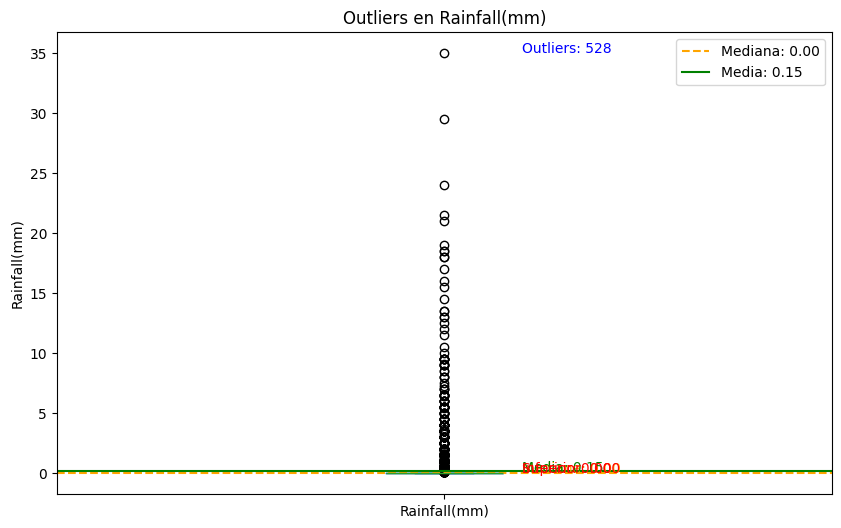

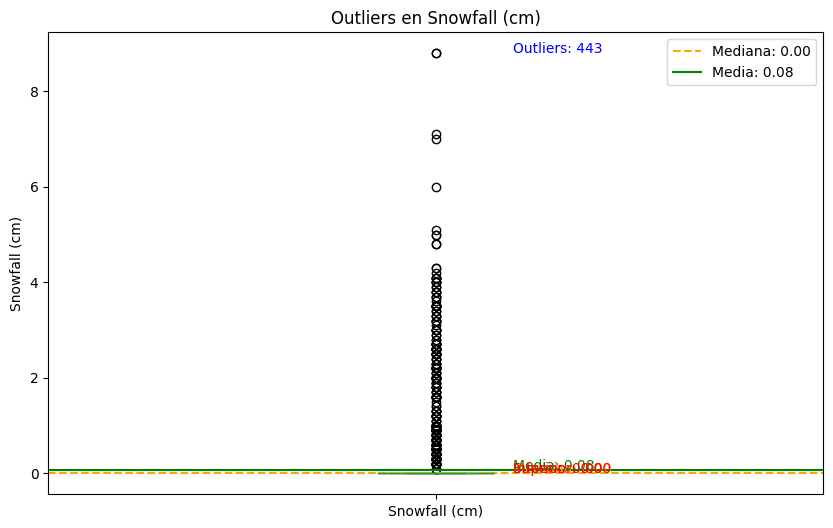

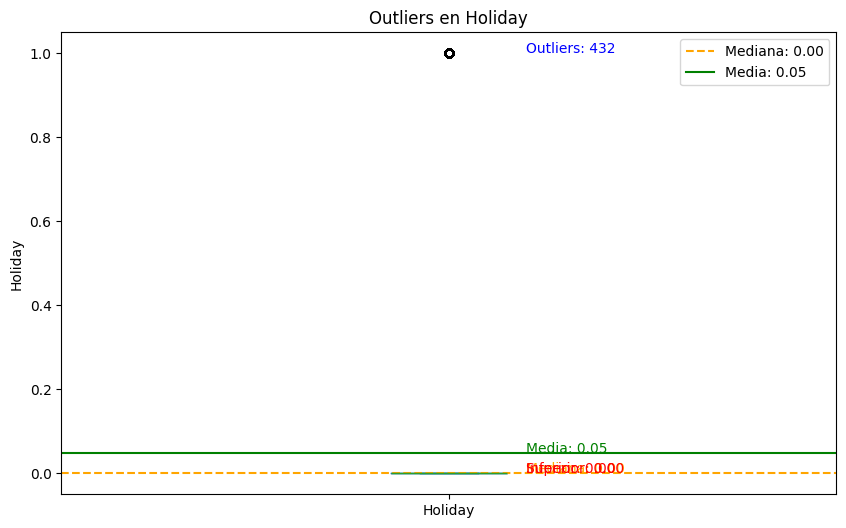

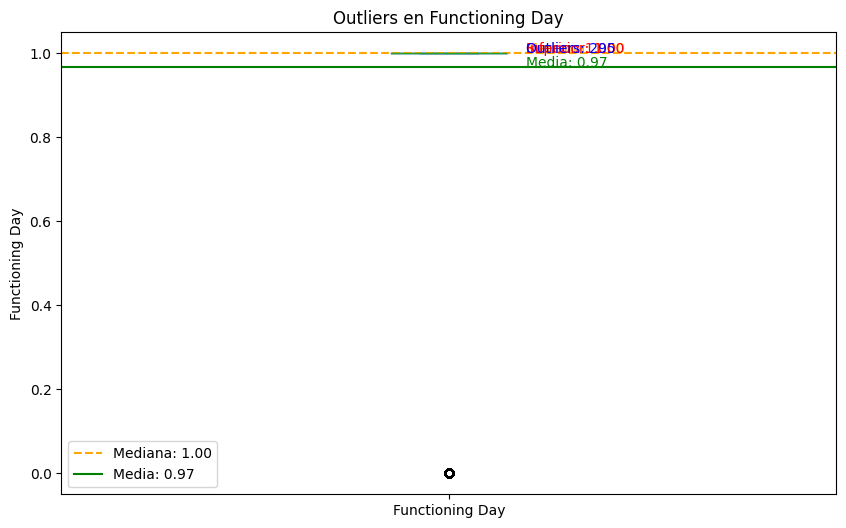

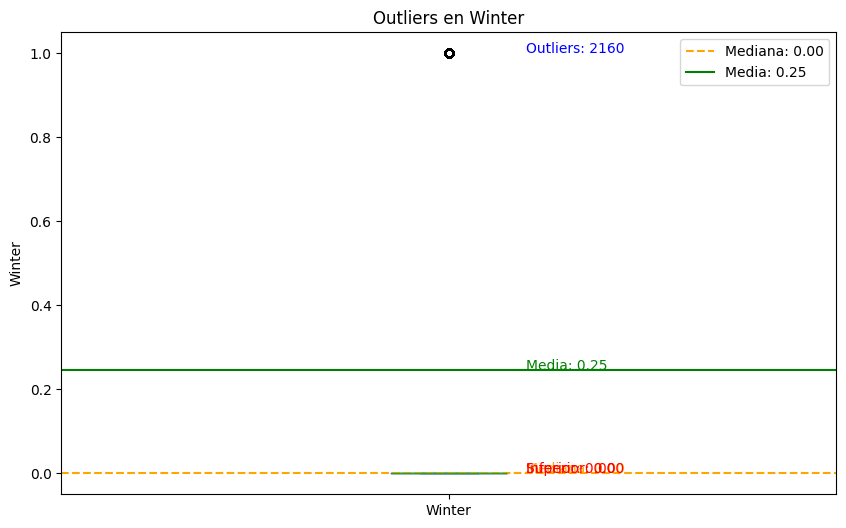

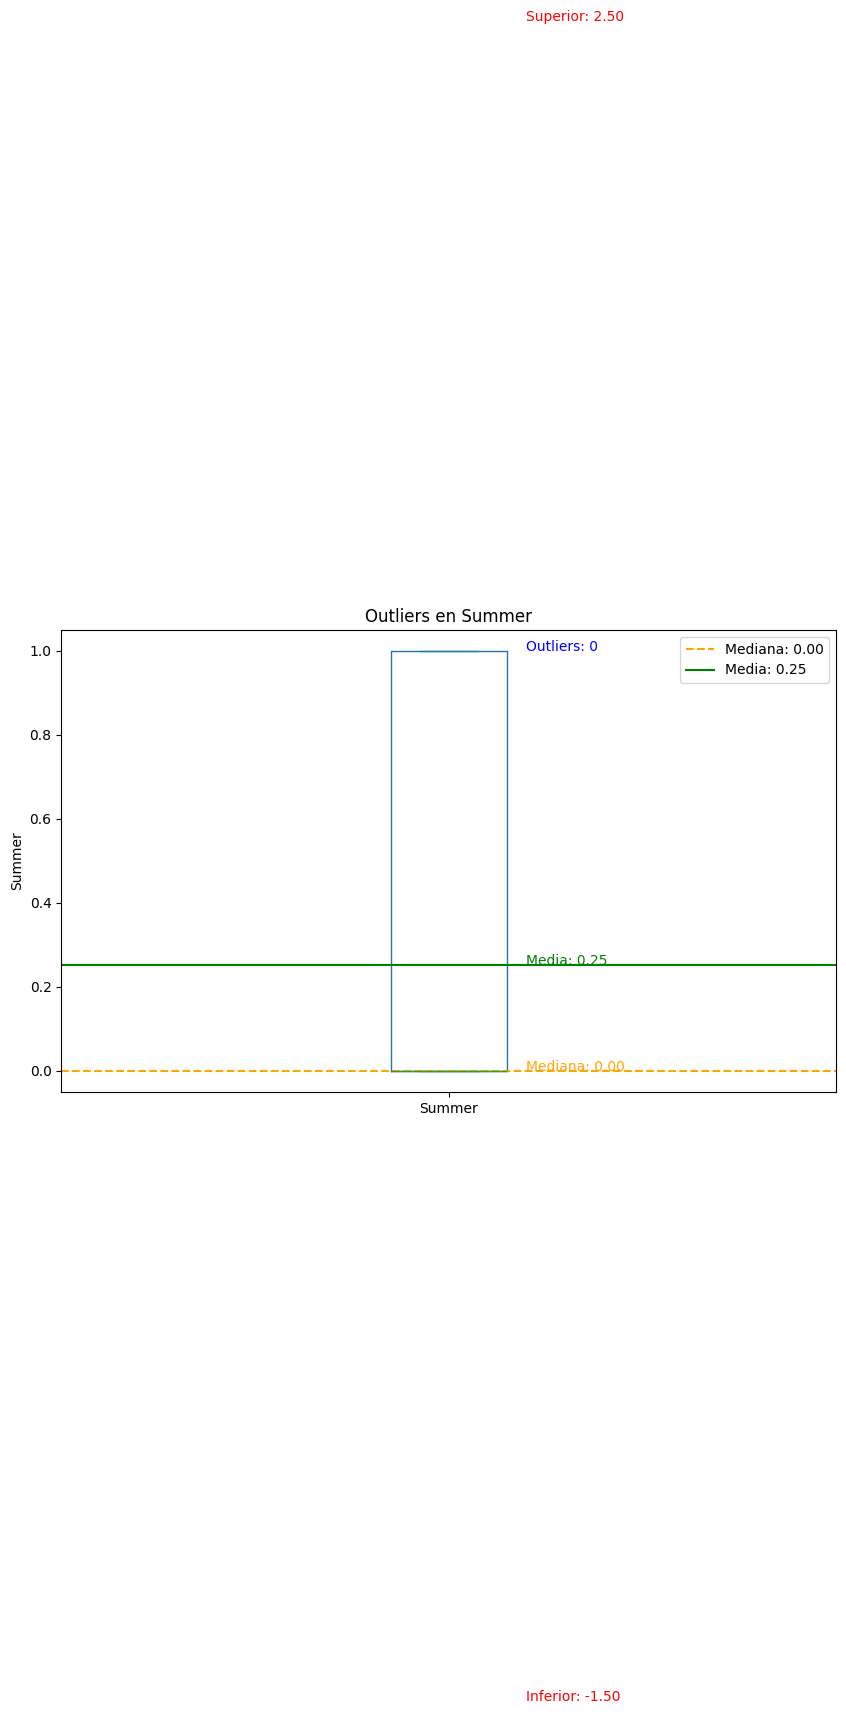

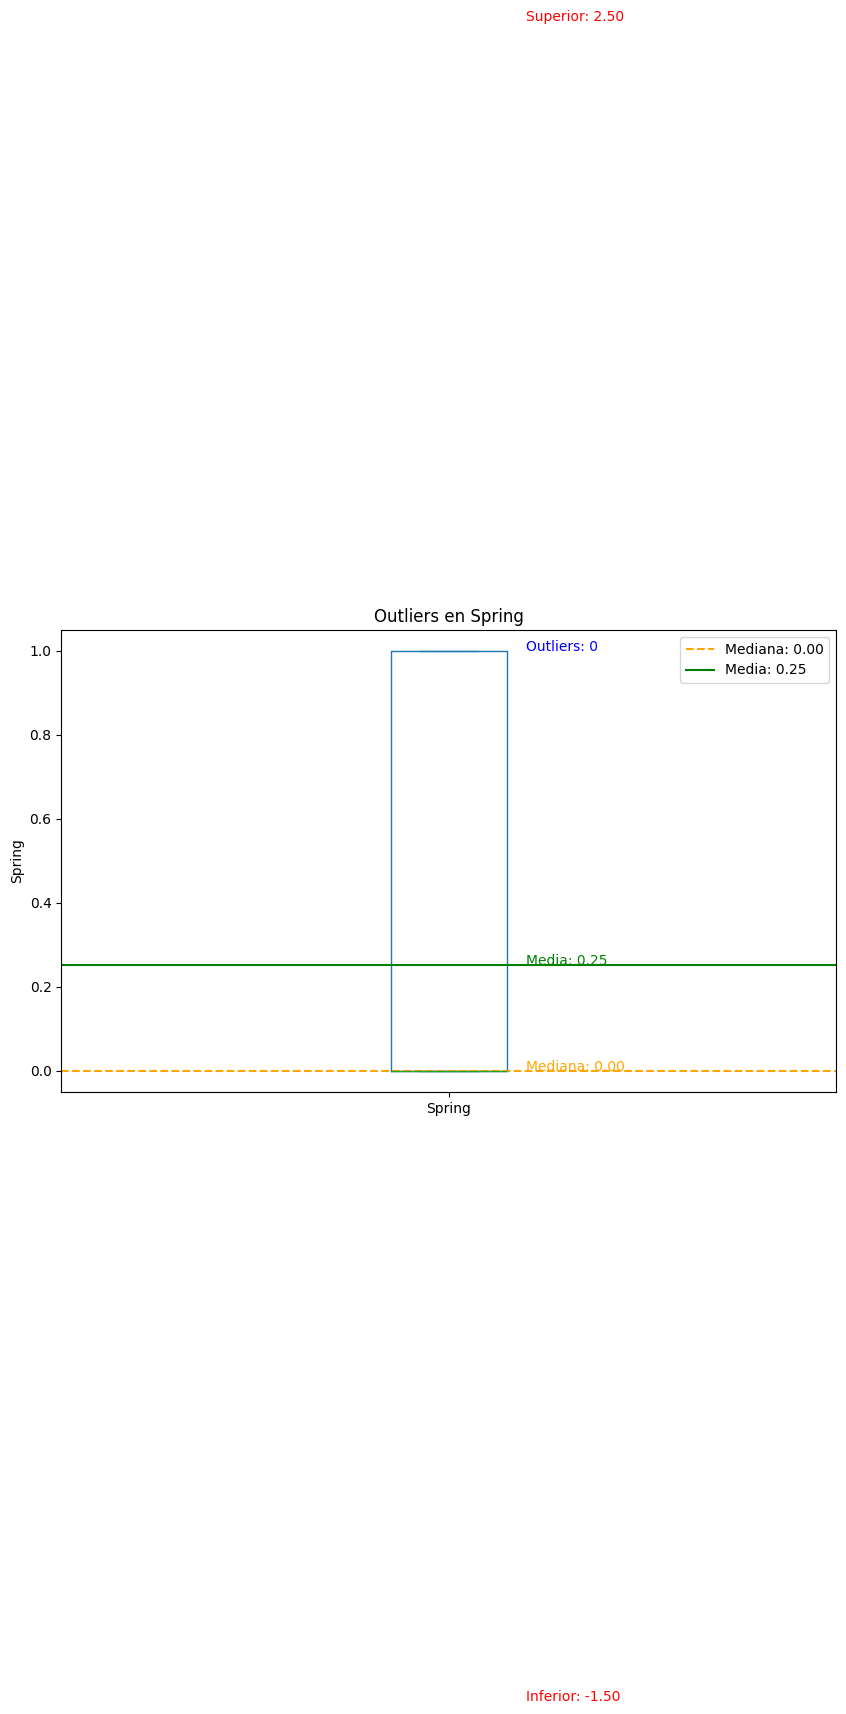

{'Rented Bike Count': (-1120.375, 2376.625, np.int64(158)), 'Hour': (-11.5, 34.5, np.int64(0)), 'Temperature(C)': (-25.0, 51.0, np.int64(0)), 'Humidity(%)': (-6.0, 122.0, np.int64(0)), 'Wind speed (m/s)': (-1.1999999999999997, 4.3999999999999995, np.int64(161)), 'Visibility (10m)': (-650.0, 3590.0, np.int64(0)), 'Dew point temperature(C)': (-33.95, 44.05, np.int64(0)), 'Solar Radiation (MJ/m2)': (-1.395, 2.325, np.int64(641)), 'Rainfall(mm)': (0.0, 0.0, np.int64(528)), 'Snowfall (cm)': (0.0, 0.0, np.int64(443)), 'Holiday': (0.0, 0.0, np.int64(432)), 'Functioning Day': (1.0, 1.0, np.int64(295)), 'Winter': (0.0, 0.0, np.int64(2160)), 'Summer': (-1.5, 2.5, np.int64(0)), 'Spring': (-1.5, 2.5, np.int64(0))}


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que 'X' esté correctamente definido
# Ejemplo: Carga de datos desde un archivo CSV
# X = pd.read_csv('tus_datos.csv')

outliers = {}

for i in X.columns:
    plt.figure(figsize=(10, 6))
    ax = X[i].plot(kind='box', title=f'Outliers en {i}', ylabel=i)
    
    # Cálculo de la mediana y la media
    median = X[i].median()
    mean = X[i].mean()
    
    # Límites de los cuartiles
    Q1 = X[i].quantile(0.25)
    Q3 = X[i].quantile(0.75)
    IQR = Q3 - Q1

    # Límites de los outliers
    inf = Q1 - 1.5 * IQR
    sup = Q3 + 1.5 * IQR
    
    # Conteo de outliers
    outliers_count = X[(X[i] < inf) | (X[i] > sup)][i].count()

    # Agregar la información al diccionario de outliers
    outliers[i] = (float(inf), float(sup), outliers_count)

    # Anotaciones en el plot
    plt.axhline(y=median, color='orange', linestyle='--', label=f'Mediana: {median:.2f}')
    plt.axhline(y=mean, color='green', linestyle='-', label=f'Media: {mean:.2f}')
    plt.text(x=1.1, y=median, s=f'Mediana: {median:.2f}', color='orange')
    plt.text(x=1.1, y=mean, s=f'Media: {mean:.2f}', color='green')
    plt.text(x=1.1, y=sup, s=f'Superior: {sup:.2f}', color='red')
    plt.text(x=1.1, y=inf, s=f'Inferior: {inf:.2f}', color='red')
    plt.text(x=1.1, y=max(X[i]), s=f'Outliers: {outliers_count}', color='blue')

    plt.legend()
    plt.show()

print(outliers)



Estas variables tiene muchos Ceros. ¿Quitarlos? ... Probablemente sí

In [16]:
c=df["Snowfall (cm)"].value_counts()
d=df["Rainfall(mm)"].value_counts()

print(c[0]/df.shape[0],  d[0]/df.shape[0])



0.9494292237442923 0.9397260273972603


Quitar datos atipicos en Wind Speed y Rented Bike Count

In [17]:
eliminar = []  

columnas_eliminar=["Wind speed (m/s)", "Rented Bike Count"] 

for i in X[columnas_eliminar].columns:
    for j in range(X.shape[0]):
        inf, sup, z = outliers[i]
        if X.loc[j, i] < inf or X.loc[j,i] > sup : 
            eliminar.append(j)

eliminar=list(set(eliminar))
print(eliminar)

X_cleaned1 = X.drop(index=eliminar)

print(f"Filas eliminadas: {len(eliminar)}")
print(X_cleaned1.shape)
print(X_cleaned1)

[4098, 4122, 4123, 8242, 8245, 6210, 4170, 4171, 82, 84, 85, 86, 87, 88, 89, 6234, 4188, 93, 4190, 4194, 2169, 2170, 2171, 2172, 4218, 2174, 2175, 2176, 2177, 2178, 6306, 6311, 6315, 6316, 6330, 4290, 4291, 6354, 231, 238, 4338, 4339, 249, 250, 252, 253, 255, 4362, 4363, 6423, 4386, 4387, 4435, 4436, 2391, 4458, 4459, 4460, 4461, 375, 4482, 4483, 4485, 6570, 4530, 4531, 2485, 4554, 4555, 4556, 6641, 4601, 6666, 6667, 6684, 6685, 6686, 6687, 4640, 6689, 6690, 6691, 4650, 4651, 4652, 4653, 6714, 571, 6719, 4672, 4673, 4674, 4675, 6738, 4698, 611, 613, 615, 620, 4721, 4722, 4723, 4724, 2679, 4745, 4746, 4747, 4748, 4749, 6810, 6811, 4770, 4771, 4772, 6834, 6835, 4796, 6848, 4808, 6858, 6859, 4818, 4819, 4820, 4821, 732, 4832, 6882, 4842, 4843, 4844, 6906, 4866, 4867, 4868, 4869, 2822, 782, 4890, 4891, 4892, 6978, 6979, 4940, 4962, 4963, 4964, 4985, 4986, 4987, 4988, 4989, 2946, 5010, 5011, 933, 934, 936, 937, 940, 2994, 947, 7094, 951, 5058, 5059, 971, 972, 973, 974, 975, 978, 3036, 3041,

Volver a visualizar datos

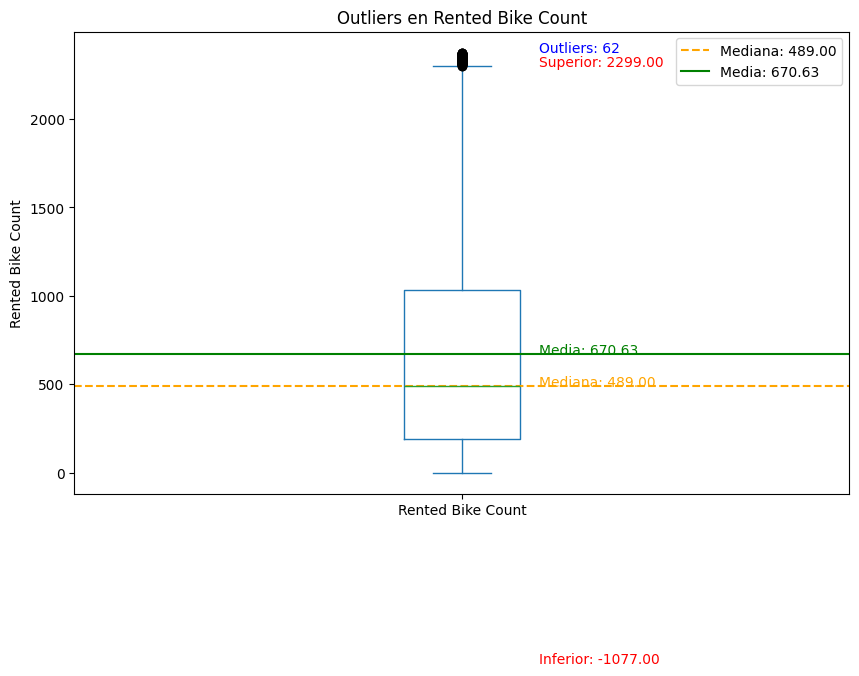

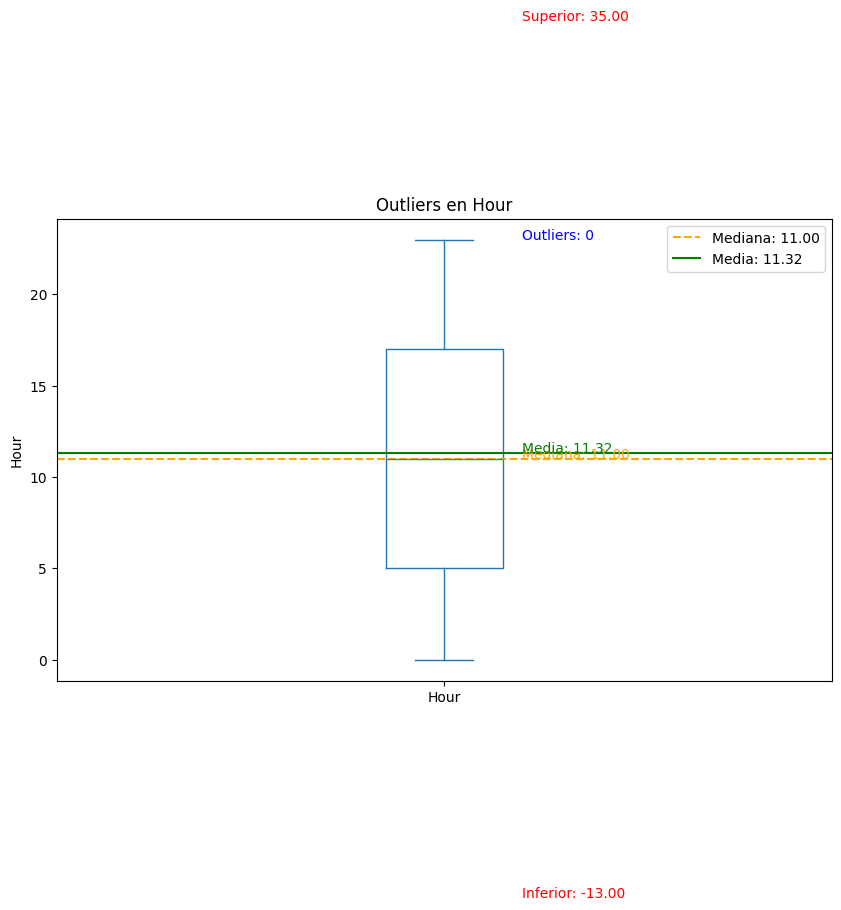

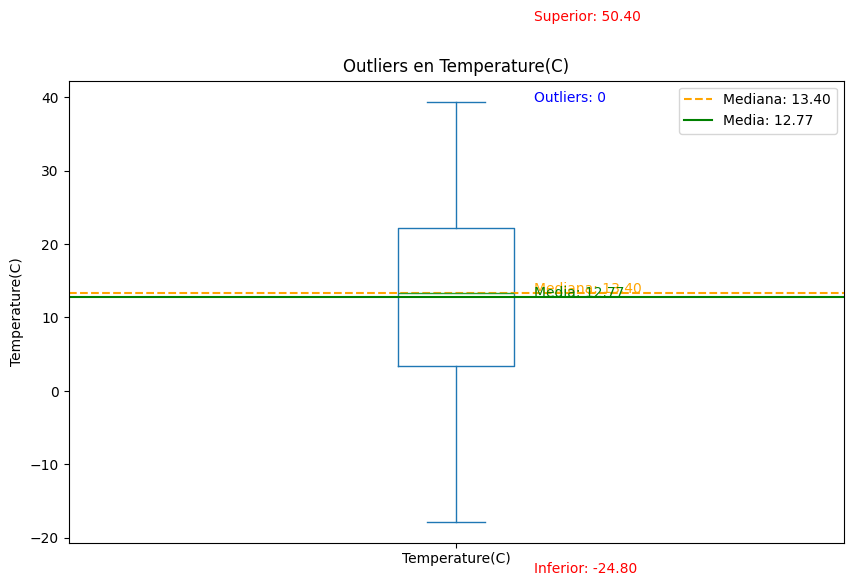

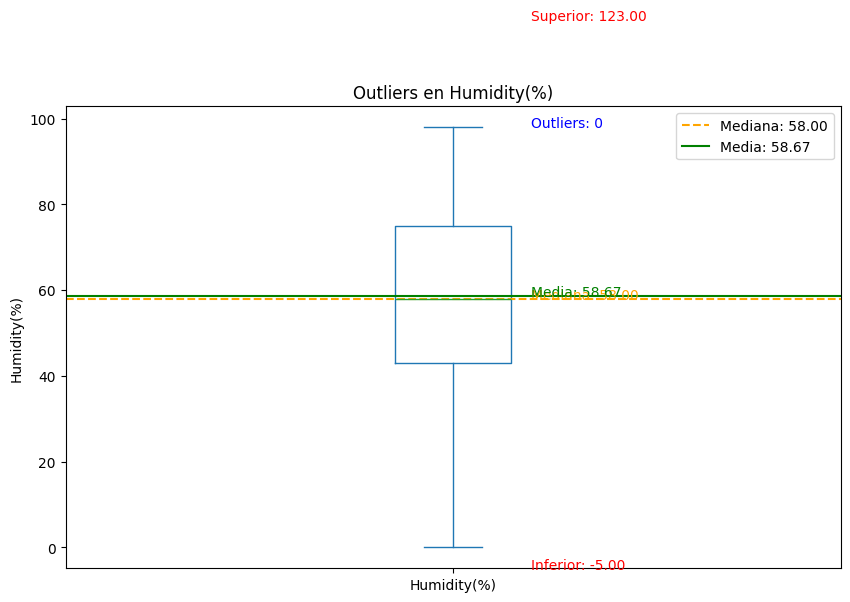

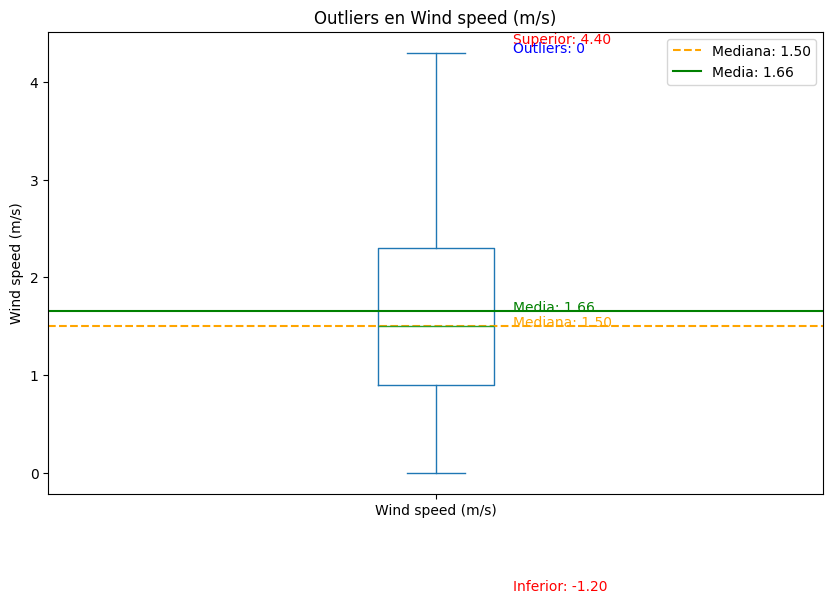

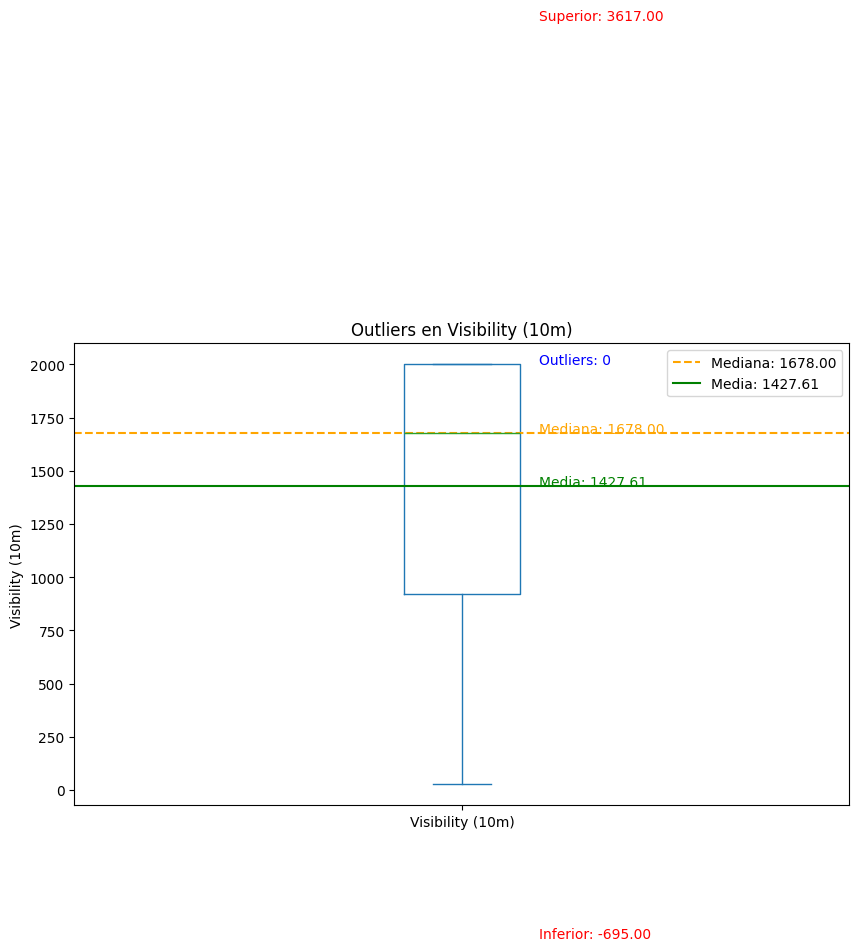

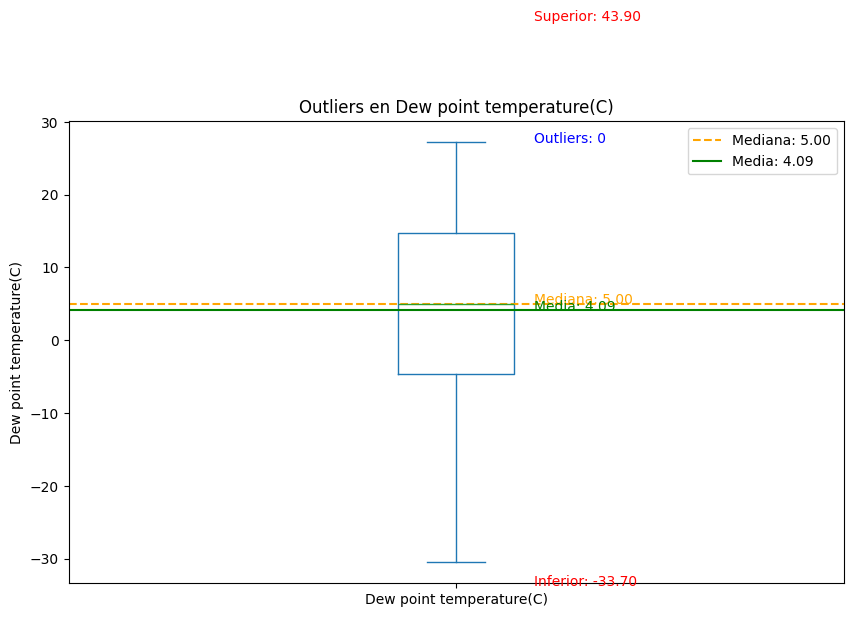

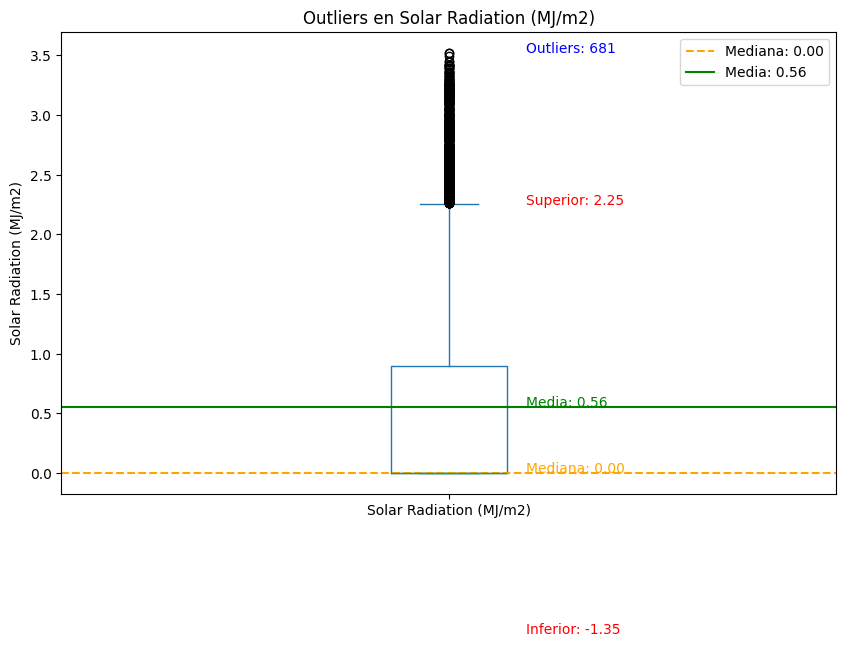

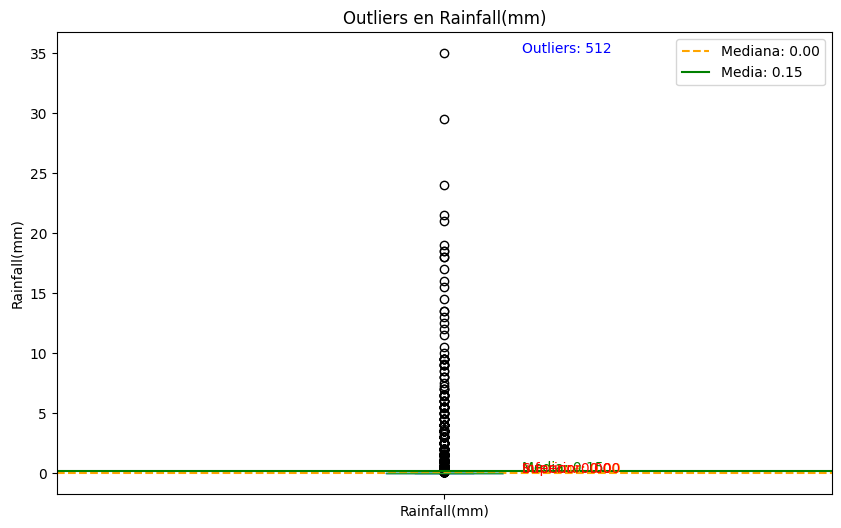

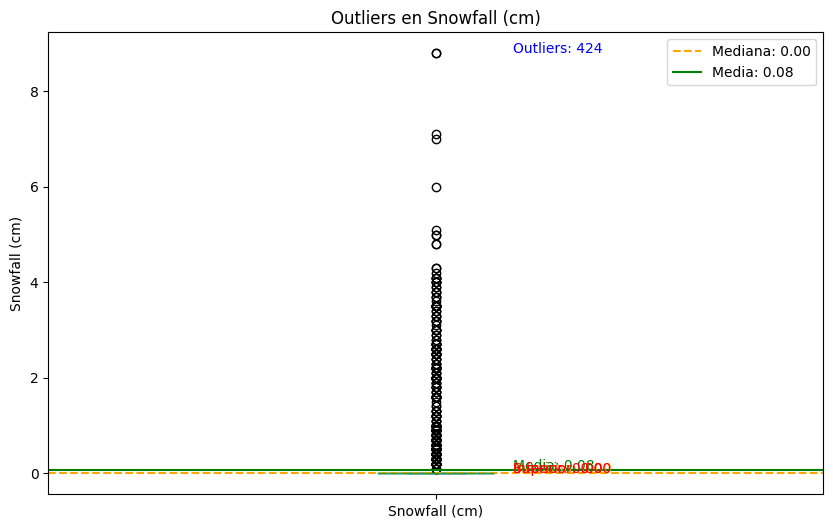

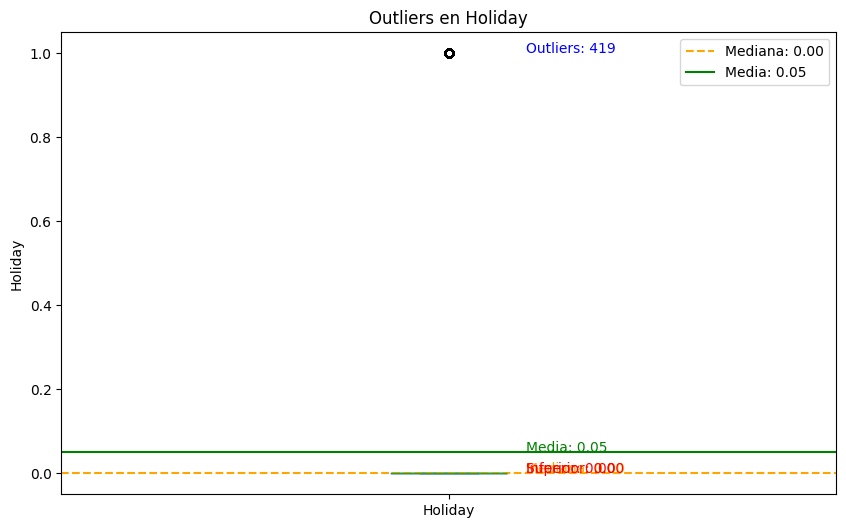

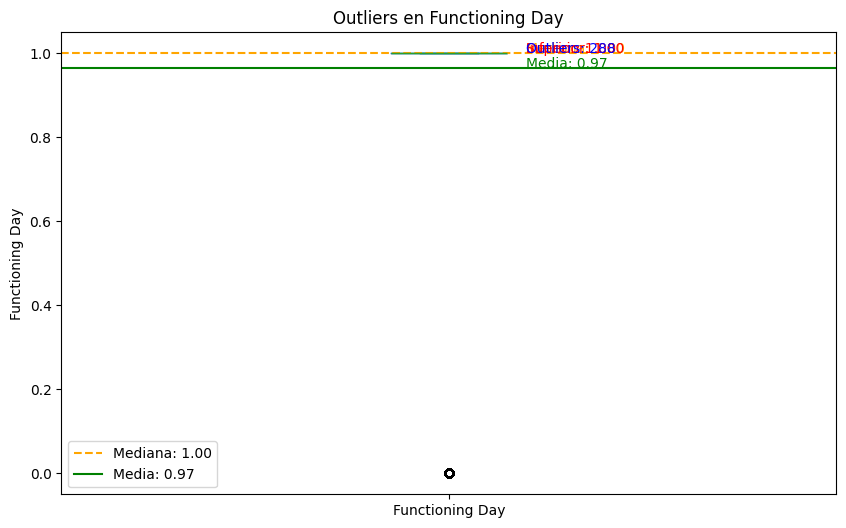

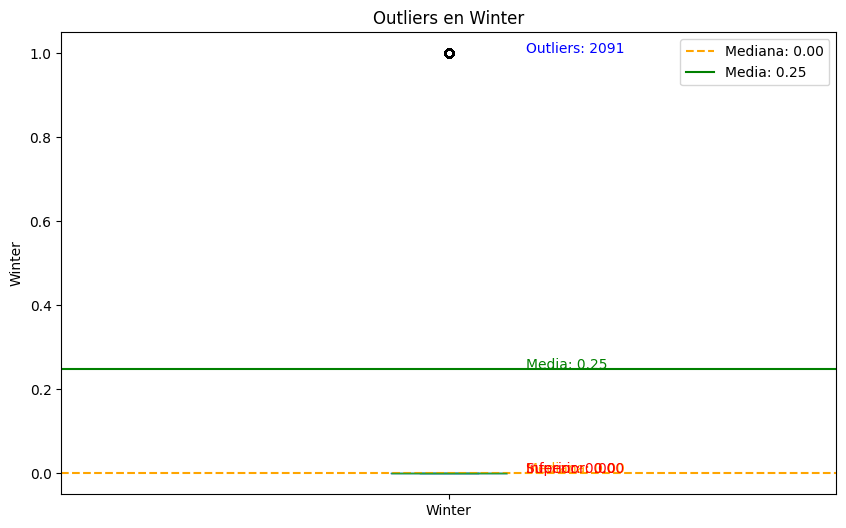

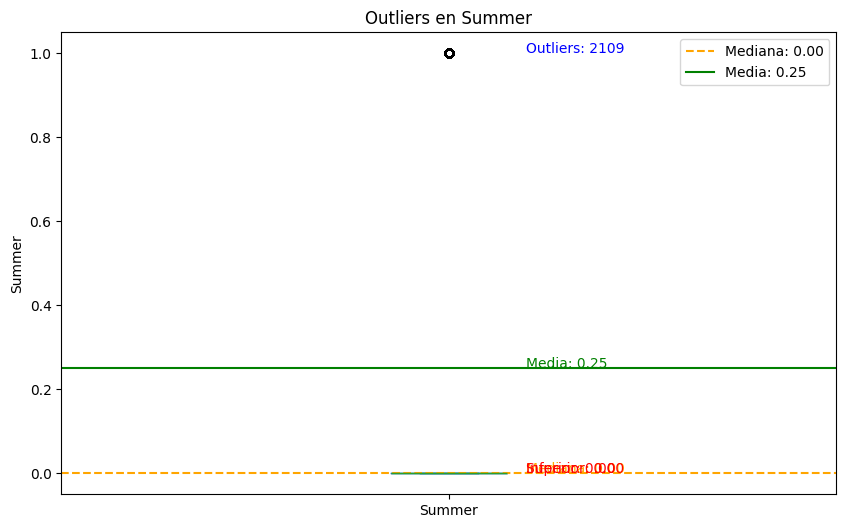

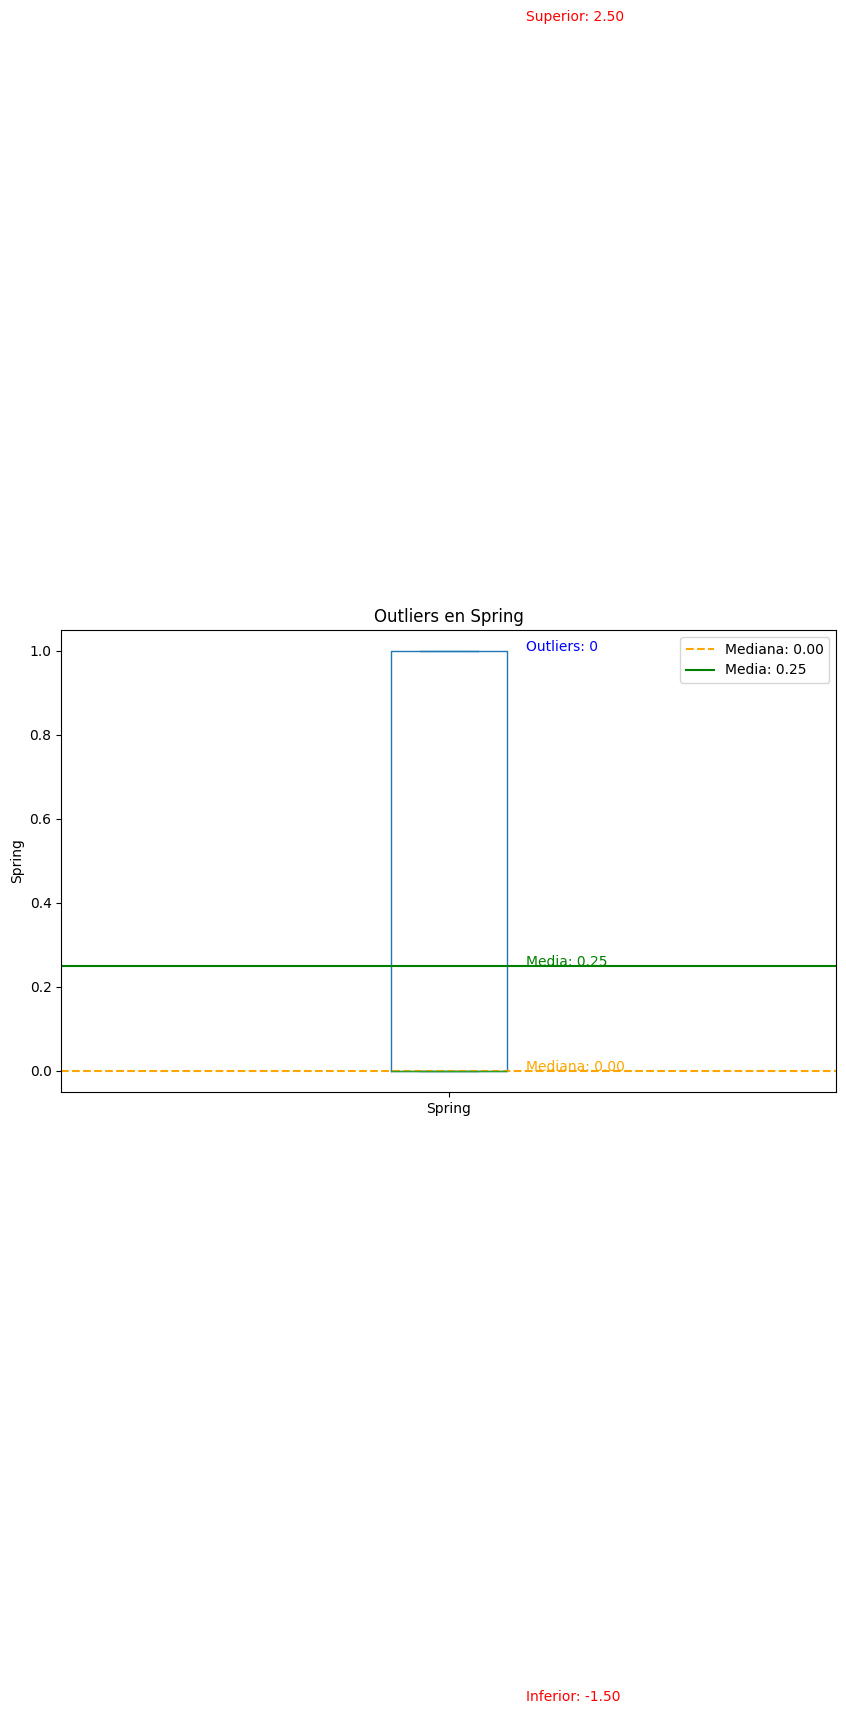

{'Rented Bike Count': (-1120.375, 2376.625, np.int64(158)), 'Hour': (-11.5, 34.5, np.int64(0)), 'Temperature(C)': (-25.0, 51.0, np.int64(0)), 'Humidity(%)': (-6.0, 122.0, np.int64(0)), 'Wind speed (m/s)': (-1.1999999999999997, 4.3999999999999995, np.int64(161)), 'Visibility (10m)': (-650.0, 3590.0, np.int64(0)), 'Dew point temperature(C)': (-33.95, 44.05, np.int64(0)), 'Solar Radiation (MJ/m2)': (-1.395, 2.325, np.int64(641)), 'Rainfall(mm)': (0.0, 0.0, np.int64(528)), 'Snowfall (cm)': (0.0, 0.0, np.int64(443)), 'Holiday': (0.0, 0.0, np.int64(432)), 'Functioning Day': (1.0, 1.0, np.int64(295)), 'Winter': (0.0, 0.0, np.int64(2160)), 'Summer': (-1.5, 2.5, np.int64(0)), 'Spring': (-1.5, 2.5, np.int64(0))}


In [18]:
import matplotlib.pyplot as plt

# Itera sobre cada columna de X_cleaned1
for i in X_cleaned1.columns:
    plt.figure(figsize=(10, 6))
    
    # Gráfico de caja para la columna actual
    ax = X_cleaned1[i].plot(kind='box', title=f'Outliers en {i}', ylabel=i)
    
    # Cálculo de estadísticas
    median = X_cleaned1[i].median()
    mean = X_cleaned1[i].mean()
    Q1 = X_cleaned1[i].quantile(0.25)
    Q3 = X_cleaned1[i].quantile(0.75)
    IQR = Q3 - Q1

    # Límites de los outliers
    inf = Q1 - 1.5 * IQR
    sup = Q3 + 1.5 * IQR
    
    # Conteo de outliers
    outliers_count = X_cleaned1[(X_cleaned1[i] < inf) | (X_cleaned1[i] > sup)][i].count()

    # Anotaciones en el gráfico
    plt.axhline(y=median, color='orange', linestyle='--', label=f'Mediana: {median:.2f}')
    plt.axhline(y=mean, color='green', linestyle='-', label=f'Media: {mean:.2f}')
    plt.text(x=1.1, y=median, s=f'Mediana: {median:.2f}', color='orange')
    plt.text(x=1.1, y=mean, s=f'Media: {mean:.2f}', color='green')
    plt.text(x=1.1, y=sup, s=f'Superior: {sup:.2f}', color='red')
    plt.text(x=1.1, y=inf, s=f'Inferior: {inf:.2f}', color='red')
    plt.text(x=1.1, y=max(X_cleaned1[i]), s=f'Outliers: {outliers_count}', color='blue')

    plt.legend()
    plt.show()

print(outliers)

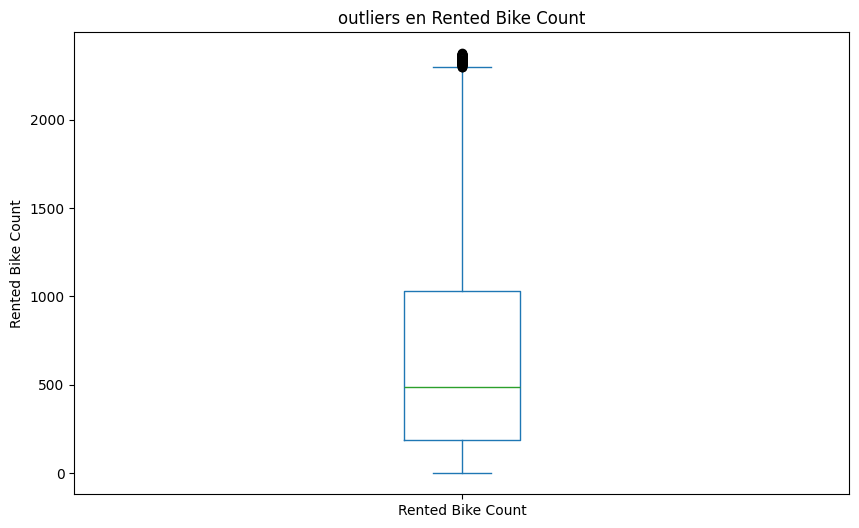

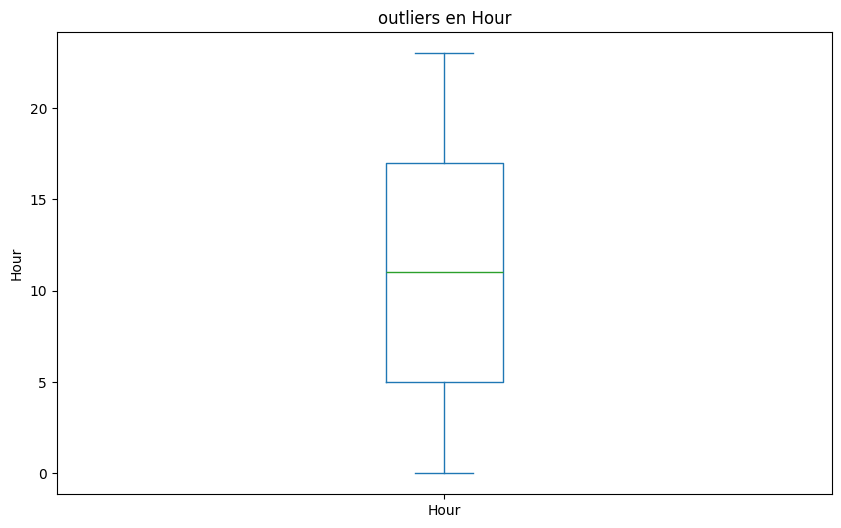

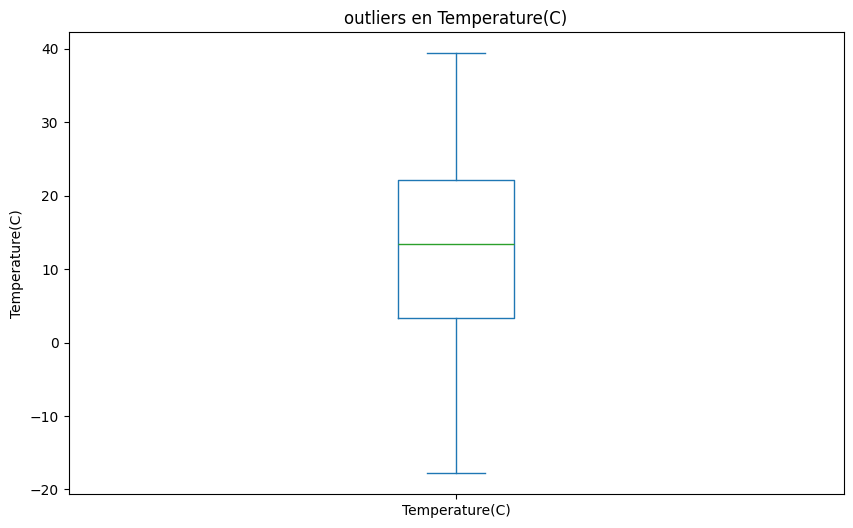

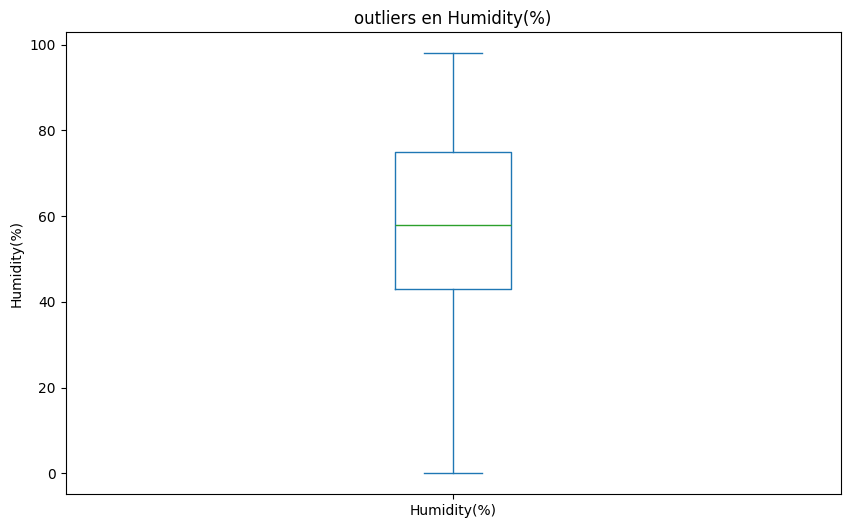

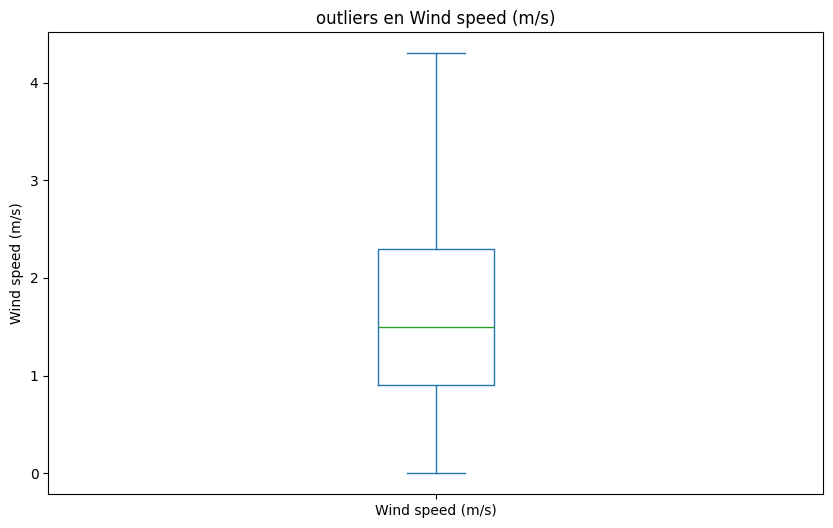

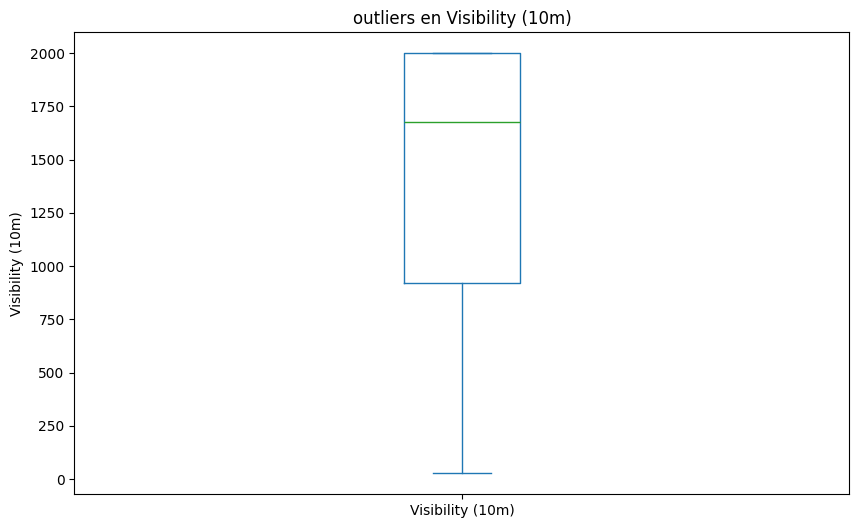

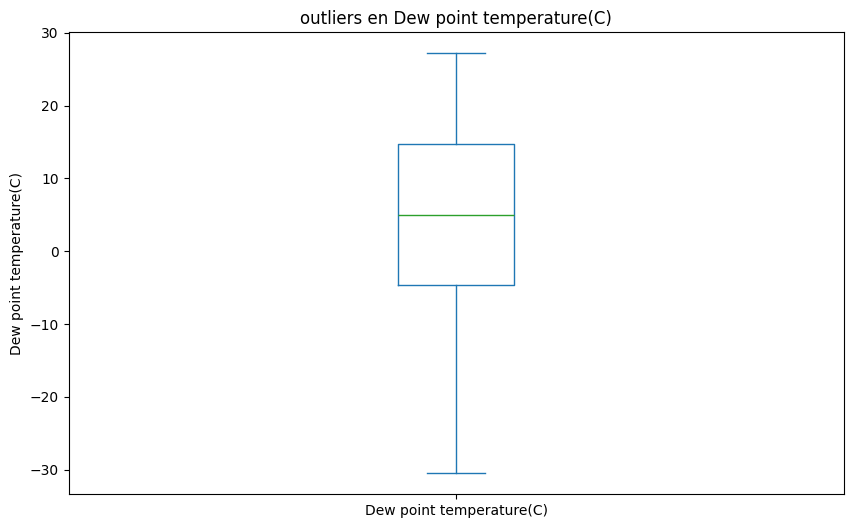

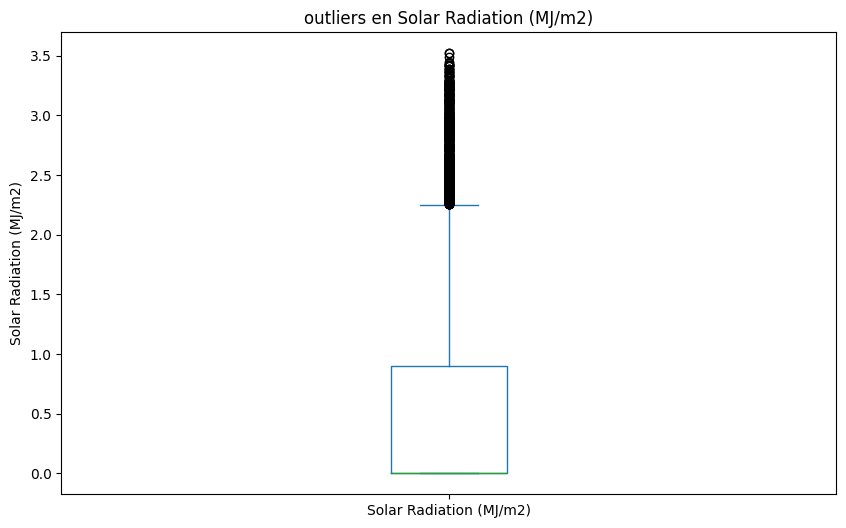

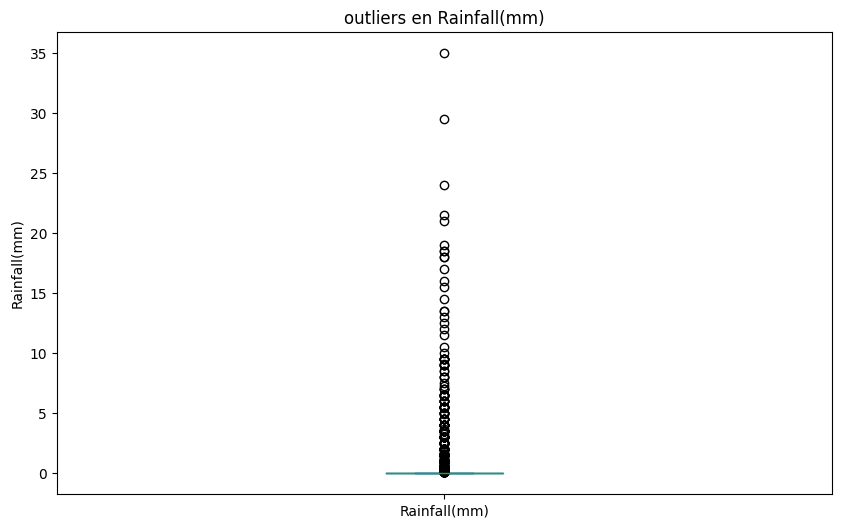

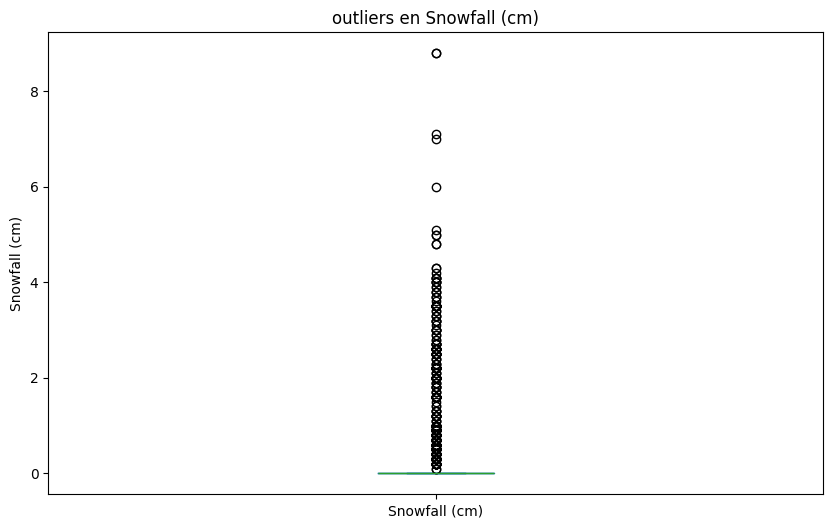

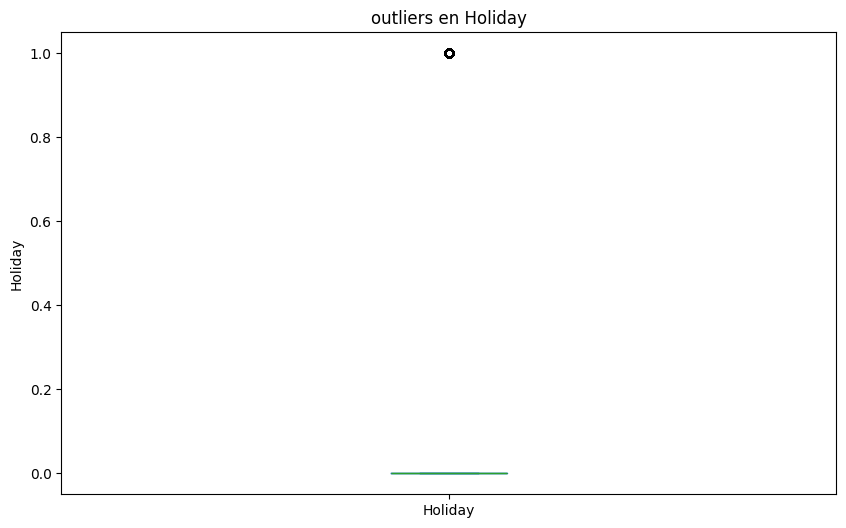

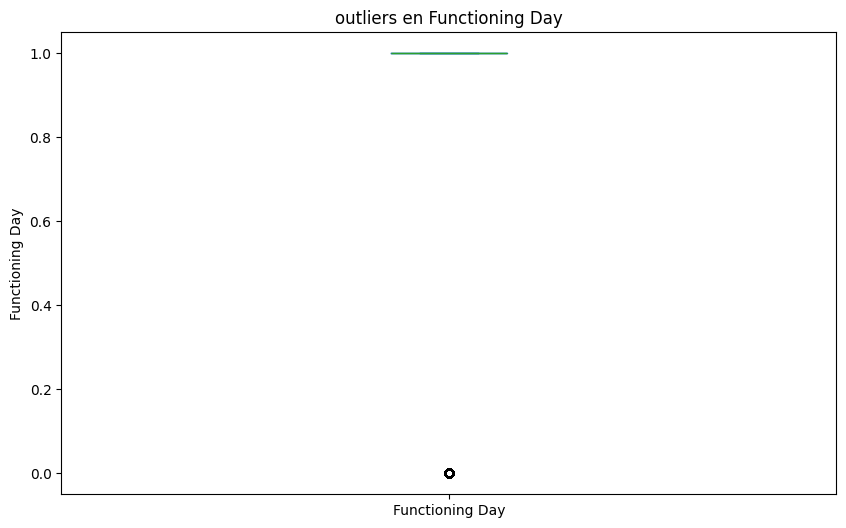

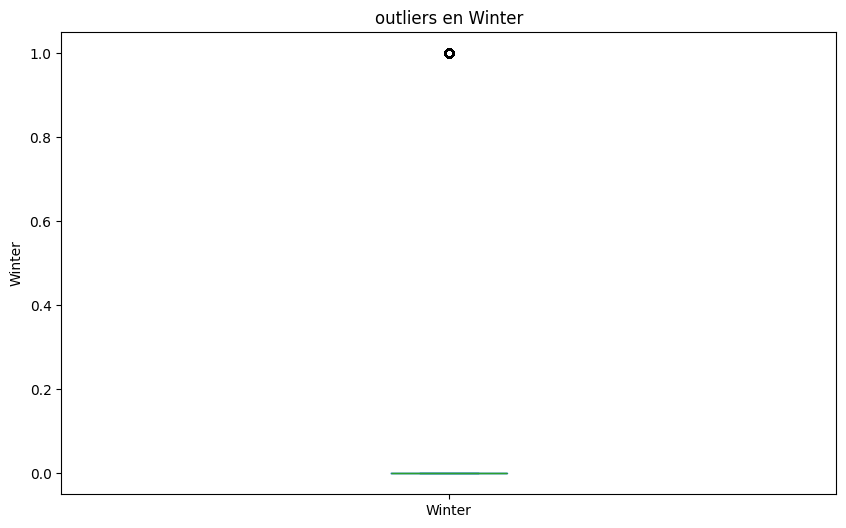

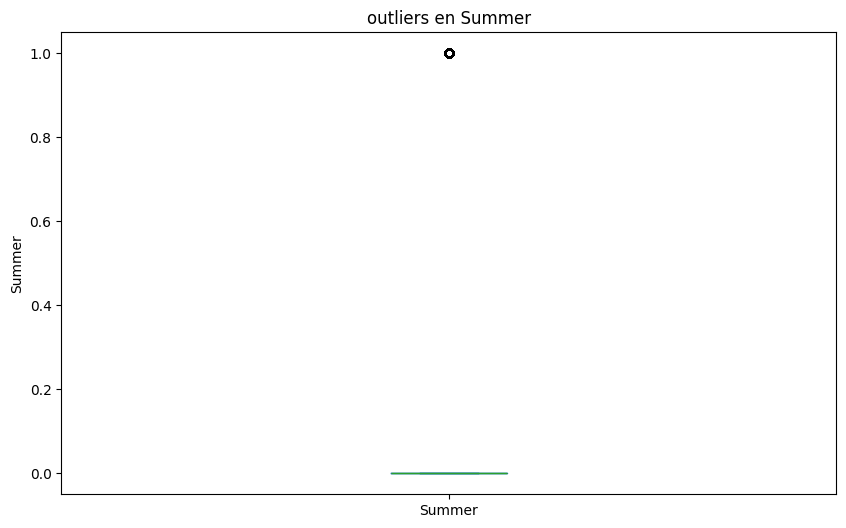

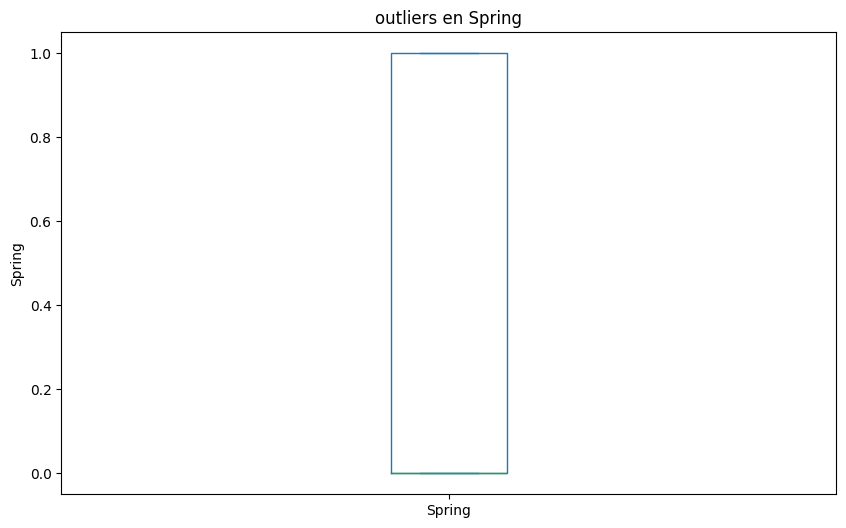

{'Rented Bike Count': (-1120.375, 2376.625, np.int64(158)), 'Hour': (-11.5, 34.5, np.int64(0)), 'Temperature(C)': (-25.0, 51.0, np.int64(0)), 'Humidity(%)': (-6.0, 122.0, np.int64(0)), 'Wind speed (m/s)': (-1.1999999999999997, 4.3999999999999995, np.int64(161)), 'Visibility (10m)': (-650.0, 3590.0, np.int64(0)), 'Dew point temperature(C)': (-33.95, 44.05, np.int64(0)), 'Solar Radiation (MJ/m2)': (-1.395, 2.325, np.int64(641)), 'Rainfall(mm)': (0.0, 0.0, np.int64(528)), 'Snowfall (cm)': (0.0, 0.0, np.int64(443)), 'Holiday': (0.0, 0.0, np.int64(432)), 'Functioning Day': (1.0, 1.0, np.int64(295)), 'Winter': (0.0, 0.0, np.int64(2160)), 'Summer': (-1.5, 2.5, np.int64(0)), 'Spring': (-1.5, 2.5, np.int64(0))}


In [19]:
for i in X_cleaned1.columns:
    plt.figure(figsize=(10, 6))
    X_cleaned1[i].plot(kind='box')
    plt.title(f'outliers en {i}')
    plt.ylabel(i)  # Añade una etiqueta al eje Y para mayor claridad
    plt.show()

print(outliers)

Quitar Rainfall y Snowfall (La mayoría de datos son cero) Las variables categorias no se quitan asi sean atipicos

In [20]:
Y=X_cleaned1.drop(["Rainfall(mm)", "Snowfall (cm)" ], axis=1)
#print(Y)

marco=df_marco.drop(["Rainfall(mm)", "Snowfall (cm)" ], axis=1)
ParaMarco=marco.drop(index=eliminar)




In [21]:
# Exportar el DataFrame a un archivo CSV
#Y.to_csv('datos_limpios_definitivos.csv', index=False)
#ParaMarco.to_csv("datos_limpios_DateSeasons.csv", index=False)


In [22]:
print(Y)

      Rented Bike Count  Hour  Temperature(C)  Humidity(%)  Wind speed (m/s)  \
0                   254     0            -5.2           37               2.2   
1                   204     1            -5.5           38               0.8   
2                   173     2            -6.0           39               1.0   
3                   107     3            -6.2           40               0.9   
4                    78     4            -6.0           36               2.3   
...                 ...   ...             ...          ...               ...   
8755               1003    19             4.2           34               2.6   
8756                764    20             3.4           37               2.3   
8757                694    21             2.6           39               0.3   
8758                712    22             2.1           41               1.0   
8759                584    23             1.9           43               1.3   

      Visibility (10m)  Dew point tempe